<a href="https://colab.research.google.com/github/Igor-source/Algorithms/blob/main/Project6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import GradientBoostingRegressor
import lightgbm as lgb
import xgboost as xgb

import time
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



In [2]:
data = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/Alghoritms_and_Data/transformed_df.csv')
data = data.drop('Unnamed: 0', axis=1)
data

,0,1,2,3,4,5,6,7,8,9,...,72,73,74,75,76,77,78,79,80,gap
0,1.380152,-1.396790,1.138701,-0.623697,-1.355643,-0.229753,-0.820006,-0.558946,0.884561,0.440781,...,0.135974,0.131545,0.083316,-0.302492,-0.215202,-0.309829,0.193556,-0.072166,-0.028544,0.2048
1,-1.065703,-1.030798,0.169913,-0.661183,1.004171,0.433279,-0.314339,0.070277,0.377711,0.436077,...,-0.087863,-0.052102,-0.126836,0.134485,-0.134111,-0.041188,-0.066734,-0.117492,-0.032189,0.2091
2,-1.006439,-0.661170,-0.491330,-0.721637,-0.914620,1.018894,-0.500122,0.954780,-0.945301,-0.410209,...,0.039562,0.035099,-0.281481,0.027908,0.260281,-0.018476,0.029018,-0.040180,0.089014,0.2215
3,-0.935284,-1.524245,0.789035,-0.636435,-0.757559,0.669952,-0.347897,-0.335254,0.677201,0.103433,...,0.061798,0.103567,0.129725,0.129292,0.146679,-0.043799,0.022157,-0.039542,0.046371,0.2066
4,-0.771928,-0.356625,-0.328355,1.270920,-0.391627,-0.848272,-0.058318,0.116577,0.533072,-0.619930,...,0.078112,0.003992,-0.049615,-0.050855,-0.000559,0.004288,-0.065564,0.152518,0.172743,0.2569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19978,0.289431,-0.622220,1.656522,-0.605985,-1.066020,0.530498,-1.359531,-0.656393,0.696412,0.663741,...,0.167978,-0.025720,0.067494,-0.277572,-0.176632,-0.108451,-0.135686,-0.199602,0.144917,0.2127
19979,0.693489,-0.112332,0.076076,0.098001,1.266993,0.074717,0.834136,0.385235,0.896887,-0.584944,...,0.220066,0.062288,-0.176342,-0.043900,-0.158691,-0.104343,0.041672,-0.014929,-0.120703,0.2075
19980,1.622306,-0.332938,-1.226158,0.071454,-0.221010,-0.013198,-1.452157,-0.269693,-0.189780,-0.261478,...,-0.004360,-0.068835,0.069521,0.154838,-0.130064,-0.131027,0.233936,-0.008212,-0.160579,0.2416
19981,-0.120016,-0.640904,-1.410589,0.968683,-1.379739,-0.722806,0.581868,0.252234,0.736860,0.328075,...,-0.149425,-0.083600,0.032811,-0.096312,-0.054456,0.047740,-0.056402,0.085385,-0.095126,0.2937


In [3]:
# Разделим данные на признаки и целевую переменную
X = data.drop('gap', axis=1)
y = data['gap']

print(X.info())
print(y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19983 entries, 0 to 19982
Data columns (total 81 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       19983 non-null  float64
 1   1       19983 non-null  float64
 2   2       19983 non-null  float64
 3   3       19983 non-null  float64
 4   4       19983 non-null  float64
 5   5       19983 non-null  float64
 6   6       19983 non-null  float64
 7   7       19983 non-null  float64
 8   8       19983 non-null  float64
 9   9       19983 non-null  float64
 10  10      19983 non-null  float64
 11  11      19983 non-null  float64
 12  12      19983 non-null  float64
 13  13      19983 non-null  float64
 14  14      19983 non-null  float64
 15  15      19983 non-null  float64
 16  16      19983 non-null  float64
 17  17      19983 non-null  float64
 18  18      19983 non-null  float64
 19  19      19983 non-null  float64
 20  20      19983 non-null  float64
 21  21      19983 non-null  float64
 22

In [4]:
# Разделение данных на тренировочную и тестовую выборки с помощью кросс-валидации
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

LightGBM

In [5]:
# Определим модель LightGBM
model = lgb.LGBMRegressor()

# Обучение модели
start_time = time.time()

model.fit(X_train, y_train)

training_time = time.time() - start_time

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.016024 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 20655
[LightGBM] [Info] Number of data points in the train set: 15986, number of used features: 81
[LightGBM] [Info] Start training from score 0.251284


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.016674 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 20655
[LightGBM] [Info] Number of data points in the train set: 17984, number of used features: 81
[LightGBM] [Info] Start training from score 0.250953
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.017600 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 20655
[LightGBM] [Info] Number of data points in the train set: 17984, number of used features: 81
[LightGBM] [Info] Start training from score 0.251233
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.016797 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 20655
[LightGBM] [Info] Number of data points in the train set: 17984, number of used features: 81
[LightGBM] [Info] Start 

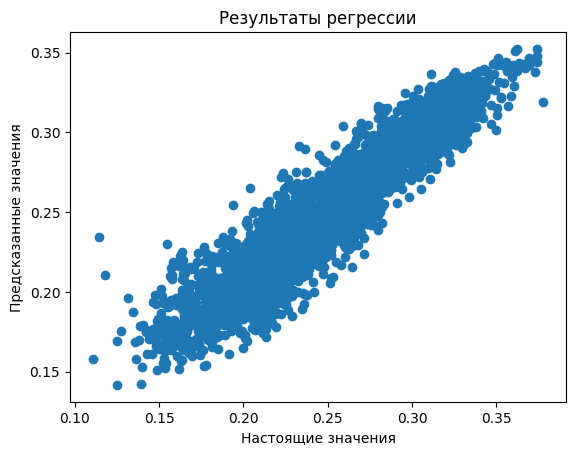

In [6]:
# Предсказание на тестовой выборке
y_pred = model.predict(X_test)

# Вычисление метрик точности
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Кросс-валидация для оценки точности модели
cv_mse_scores = -cross_val_score(model, X, y, cv=10, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(cv_mse_scores)
cv_mae_scores = -cross_val_score(model, X, y, cv=10, scoring='neg_mean_absolute_error')
cv_r2_scores = cross_val_score(model, X, y, cv=10, scoring='r2')

# Визуализация результата и метрики точности
plt.scatter(y_test, y_pred)
plt.xlabel("Настоящие значения")
plt.ylabel("Предсказанные значения")
plt.title("Результаты регрессии")
plt.show()

In [7]:
# Вывод результатов
print("Метрики на тестовой выборке:")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

print("\nМетрики при кросс-валидации:")
print(f"Среднее MSE: {np.mean(cv_mse_scores)}")
print(f"Среднее RMSE: {np.mean(cv_rmse_scores)}")
print(f"Среднее MAE: {np.mean(cv_mae_scores)}")
print(f"Среднее R2: {np.mean(cv_r2_scores)}")

# Вывод времени обучения
print(f"\nВремя, затраченное на обучение модели: {training_time} секунд")

Метрики на тестовой выборке:
MSE: 0.0002713633027584939
RMSE: 0.016473108472856417
MAE: 0.012727870050920846
R2: 0.877181521369649

Метрики при кросс-валидации:
Среднее MSE: 0.00027917334012485804
Среднее RMSE: 0.016700597179180734
Среднее MAE: 0.012762331628355661
Среднее R2: 0.874088074146453

Время, затраченное на обучение модели: 3.0291354656219482 секунд


XGBoost

In [8]:
# Определим модель XGBoost
model = xgb.XGBRegressor()

# Обучение модели
start_time = time.time()

model.fit(X_train, y_train)

training_time = time.time() - start_time


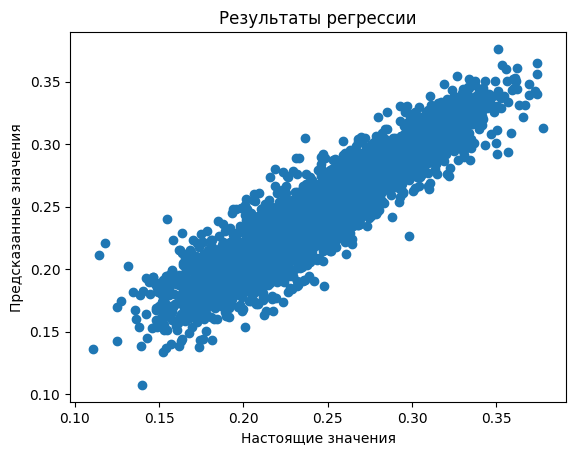

Метрики на тестовой выборке:
MSE: 0.0002906283460753432
RMSE: 0.01704782525940899
MAE: 0.013061241313538493
R2: 0.8684622019669477

Метрики при кросс-валидации:
Среднее MSE: 0.0002830039329096592
Среднее RMSE: 0.016816176346864064
Среднее MAE: 0.012811848388811392
Среднее R2: 0.8722963884700483

Время, затраченное на обучение модели: 3.98361873626709 секунд


In [10]:
# Предсказание на тестовой выборке
y_pred = model.predict(X_test)

# Вычисление метрик точности
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Кросс-валидация для оценки точности модели
cv_mse_scores = -cross_val_score(model, X, y, cv=10, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(cv_mse_scores)
cv_mae_scores = -cross_val_score(model, X, y, cv=10, scoring='neg_mean_absolute_error')
cv_r2_scores = cross_val_score(model, X, y, cv=10, scoring='r2')

# Визуализация результата и метрики точности
plt.scatter(y_test, y_pred)
plt.xlabel("Настоящие значения")
plt.ylabel("Предсказанные значения")
plt.title("Результаты регрессии")
plt.show()

# Вывод результатов
print("Метрики на тестовой выборке:")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R2: {r2}")
print("\nМетрики при кросс-валидации:")
print(f"Среднее MSE: {np.mean(cv_mse_scores)}")
print(f"Среднее RMSE: {np.mean(cv_rmse_scores)}")
print(f"Среднее MAE: {np.mean(cv_mae_scores)}")
print(f"Среднее R2: {np.mean(cv_r2_scores)}")

# Вывод времени обучения
print(f"\nВремя, затраченное на обучение модели: {training_time} секунд")


Выбор модели

Среднее значение R2: Обе модели, LGBM и XGB, показывают высокие значения среднего R2, что указывает на хорошее качество их прогнозов. Среднее значение R2 для LGBM составляет 0.874, а для XGB - 0.872. Это говорит о том, что обе модели хорошо соотносятся с данными и обладают хорошей способностью к предсказанию.

Время обучения модели: LGBM требует меньше времени на обучение по сравнению с XGB. Время, затраченное на обучение модели LGBM, составляет 3.03 секунды, в то время как XGB требует 3.98 секунды. Это означает, что LGBM работает более эффективно в плане времени, что может быть важным фактором при обучении модели на больших наборах данных или при использовании в приложениях, где время обучения критично.

Таким образом, на основании представленных данных, LGBM может быть предпочтительнее XGB из-за более высокой скорости обучения и схожих показателей качества прогнозов.